# KNN Classification

In [164]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

RSEED = 42

In [165]:
from sklearn.pipeline import Pipeline # focus on this one
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, roc_auc_score, f1_score, roc_curve, r2_score, fbeta_score,cohen_kappa_score, f1_score

In [166]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [167]:
df = pd.read_pickle("data/df_train_1.pkl")
df

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,...,L3_NO2_cloud_fraction,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_cloud_fraction,L3_O3_O3_column_number_density,L3_O3_cloud_fraction,L3_SO2_SO2_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction
0,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,...,0.006507,0.021080,267.017184,0.000064,0.000000,0.119095,0.000000,-0.000127,-1.861476,0.000000
1,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,...,0.018360,0.022017,61.216687,0.000171,0.059433,0.115179,0.059433,0.000150,-1.452612,0.059433
2,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,...,0.015904,0.020677,134.700335,0.000124,0.082063,0.115876,0.082063,0.000150,-1.572950,0.082063
3,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,...,0.055765,0.021207,474.821444,0.000081,0.121261,0.141557,0.121261,0.000227,-1.239317,0.121261
4,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,...,0.028530,0.037766,926.926310,0.000140,0.037919,0.126369,0.037919,0.000390,0.202489,0.037919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,0.00352,...,0.001107,0.039941,192.388239,0.000024,0.001310,0.174995,0.001310,0.000312,-1.953480,0.001310
30553,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,0.00341,...,0.004726,0.037872,61.379434,-0.000014,0.007644,0.157659,0.007644,0.000362,-2.178236,0.007644
30554,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,0.00356,...,0.026249,0.038539,1572.596434,0.000094,0.025447,0.168295,0.025447,0.000107,-2.365827,0.025447
30555,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,0.00523,...,0.144318,0.038757,846.961465,0.000063,0.103292,0.160637,0.173391,0.000014,-2.784346,0.153445


In [168]:
# create windstrength column
df['windstrength'] = np.sqrt(df.u_component_of_wind_10m_above_ground**2 + df.v_component_of_wind_10m_above_ground**2)
df.windstrength.describe()

count    30557.000000
mean         3.100731
std          2.209016
min          0.020040
25%          1.497562
50%          2.545925
75%          4.152956
max         18.160623
Name: windstrength, dtype: float64

In [169]:
df.columns

Index(['Date', 'Place_ID', 'target', 'target_min', 'target_max',
       'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_AER_AI_absorbing_aerosol_index', 'L3_CLOUD_cloud_base_height',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_NO2_NO2_column_number_density', 'L3_NO2_absorbing_aerosol_index',
       'L3_NO2_cloud_fraction', 'L3_CO_CO_column_number_density',
       'L3_CO_cloud_height', 'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_cloud_fraction', 'L3_O3_O3_column_number_density',
       'L3_O3_cloud_fraction', 'L3_SO2_SO2_column_number_density',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction',
       'windstrength'],
      dtype='object')

In [170]:
df.shape

(30557, 30)

In [171]:
import pandas as pd
from datetime import datetime, date, time, timedelta

In [172]:
# change date to datetime
df.Date = pd.to_datetime(df['Date'], format='%Y-%m-%d')


In [173]:
# change date to datetime
df['weekday'] = df.Date.dt.dayofweek

In [174]:
df

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,...,L3_CO_cloud_height,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_cloud_fraction,L3_O3_O3_column_number_density,L3_O3_cloud_fraction,L3_SO2_SO2_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,windstrength,weekday
0,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,...,267.017184,0.000064,0.000000,0.119095,0.000000,-0.000127,-1.861476,0.000000,2.343506,3
1,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,...,61.216687,0.000171,0.059433,0.115179,0.059433,0.000150,-1.452612,0.059433,3.536009,4
2,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,...,134.700335,0.000124,0.082063,0.115876,0.082063,0.000150,-1.572950,0.082063,6.157557,5
3,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,...,474.821444,0.000081,0.121261,0.141557,0.121261,0.000227,-1.239317,0.121261,3.198883,6
4,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,...,926.926310,0.000140,0.037919,0.126369,0.037919,0.000390,0.202489,0.037919,3.742413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,0.00352,...,192.388239,0.000024,0.001310,0.174995,0.001310,0.000312,-1.953480,0.001310,6.383007,6
30553,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,0.00341,...,61.379434,-0.000014,0.007644,0.157659,0.007644,0.000362,-2.178236,0.007644,2.463107,0
30554,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,0.00356,...,1572.596434,0.000094,0.025447,0.168295,0.025447,0.000107,-2.365827,0.025447,0.171193,1
30555,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,0.00523,...,846.961465,0.000063,0.103292,0.160637,0.173391,0.000014,-2.784346,0.153445,1.504039,2


In [175]:
# Dropping the unnecessary columns 
df.drop(['Date',
         #'Place_ID',
         'target_min',
         'target_max',
         'target_variance',
         'target_count',
         'u_component_of_wind_10m_above_ground',
         'v_component_of_wind_10m_above_ground',
         ], axis=1, inplace=True)
df.columns

Index(['Place_ID', 'target', 'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'L3_AER_AI_absorbing_aerosol_index', 'L3_CLOUD_cloud_base_height',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_NO2_NO2_column_number_density', 'L3_NO2_absorbing_aerosol_index',
       'L3_NO2_cloud_fraction', 'L3_CO_CO_column_number_density',
       'L3_CO_cloud_height', 'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_cloud_fraction', 'L3_O3_O3_column_number_density',
       'L3_O3_cloud_fraction', 'L3_SO2_SO2_column_number_density',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction',
       'windstrength', 'weekday'],
      dtype='object')

In [176]:
df.shape

(30557, 24)

In [177]:
df.dropna(thresh=len(df.columns)-8, inplace=True)

In [178]:
df.shape

(28613, 24)

In [179]:
df = df.reset_index(drop=True)

In [180]:
df["target"] = pd.cut(df.target, bins=[0, 35, 115, 850], labels=['1', '2', '3'])

<AxesSubplot:xlabel='target', ylabel='Count'>

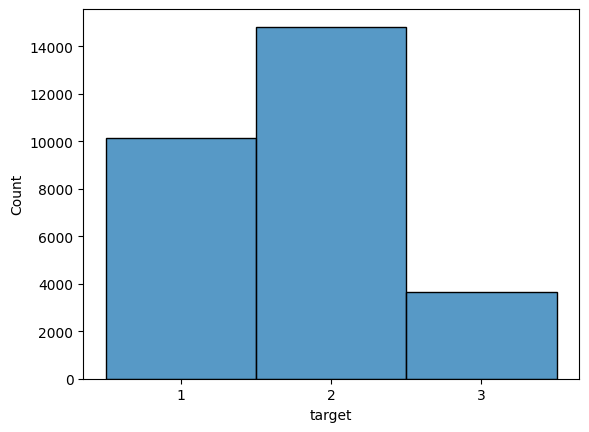

In [181]:
sns.histplot(data= df.target)

In [182]:
df

,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,L3_AER_AI_absorbing_aerosol_index,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,...,L3_CO_cloud_height,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_cloud_fraction,L3_O3_O3_column_number_density,L3_O3_cloud_fraction,L3_SO2_SO2_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,windstrength,weekday
0,010Q650,2,11.000000,60.200001,0.00804,18.516840,-1.231330,NaN,0.000000,NaN,...,267.017184,0.000064,0.000000,0.119095,0.000000,-0.000127,-1.861476,0.000000,2.343506,3
1,010Q650,2,14.600000,48.799999,0.00839,22.546533,-1.082553,175.019862,0.059358,5.958538,...,61.216687,0.000171,0.059433,0.115179,0.059433,0.000150,-1.452612,0.059433,3.536009,4
2,010Q650,1,16.400000,33.400002,0.00750,27.031030,-1.001241,275.903991,0.082247,5.755760,...,134.700335,0.000124,0.082063,0.115876,0.082063,0.000150,-1.572950,0.082063,6.157557,5
3,010Q650,2,6.911948,21.300001,0.00391,23.971857,-0.777023,383.692363,0.121555,6.246885,...,474.821444,0.000081,0.121261,0.141557,0.121261,0.000227,-1.239317,0.121261,3.198883,6
4,010Q650,1,13.900001,44.700001,0.00535,16.816309,0.366324,4314.483127,0.037008,4.205691,...,926.926310,0.000140,0.037919,0.126369,0.037919,0.000390,0.202489,0.037919,3.742413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28608,YWSFY6Q,1,9.500000,87.200005,0.00479,5.174493,-1.450993,324.841746,0.069446,7.020483,...,588.656036,0.000100,0.068359,0.160607,0.068359,0.000488,-1.943523,0.068359,2.220300,5
28609,YWSFY6Q,1,6.700000,68.300003,0.00352,4.256799,-1.412609,275.606335,0.001238,5.875377,...,192.388239,0.000024,0.001310,0.174995,0.001310,0.000312,-1.953480,0.001310,6.383007,6
28610,YWSFY6Q,2,6.300000,77.700005,0.00341,2.067438,-1.448509,438.979426,0.007750,5.068010,...,61.379434,-0.000014,0.007644,0.157659,0.007644,0.000362,-2.178236,0.007644,2.463107,0
28611,YWSFY6Q,2,7.100000,68.500000,0.00356,4.438623,-1.722478,7774.236507,0.026480,10.443789,...,1572.596434,0.000094,0.025447,0.168295,0.025447,0.000107,-2.365827,0.025447,0.171193,1


#### Categorical and numerical variables

In [183]:
# Creating list for categorical predictors/features 
# (dates are also objects so if you have them in your data you would deal with them first)
cat_features = list(df.columns[df.dtypes==object])
cat_features

['Place_ID']

In [184]:
# Creating list for categorical predictors/features 
# (dates are also objects so if you have them in your data you would deal with them first)
time_features = ['weekday']
time_features

['weekday']

In [185]:
# Creating list for numerical predictors/features
# Since 'target' is our target variable we will exclude this feature from this list of numerical predictors 
num_features = [#'target_min', 'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground',
       'temperature_2m_above_ground',
       #'u_component_of_wind_10m_above_ground',
       #'v_component_of_wind_10m_above_ground'
       'windstrength'
       ]
num_features

['precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'windstrength']

In [186]:
# Creating list for numerical predictors/features
# Since 'outcome' is our target variable we will exclude this feature from this list of numerical predictors 
miss_features = ['L3_AER_AI_absorbing_aerosol_index', 
       'L3_CLOUD_cloud_base_height',
       'L3_CLOUD_cloud_fraction', 
       'L3_CLOUD_cloud_optical_depth',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_cloud_fraction', 
       'L3_CO_cloud_height',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_cloud_fraction', 
       'L3_SO2_SO2_column_number_density',
       'L3_SO2_cloud_fraction']
miss_features

['L3_AER_AI_absorbing_aerosol_index',
 'L3_CLOUD_cloud_base_height',
 'L3_CLOUD_cloud_fraction',
 'L3_CLOUD_cloud_optical_depth',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_cloud_fraction',
 'L3_CO_cloud_height',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_SO2_SO2_column_number_density',
 'L3_SO2_cloud_fraction']

In [187]:
replace_features = ["L3_NO2_absorbing_aerosol_index",
                    "L3_CO_CO_column_number_density",
                    "L3_O3_O3_column_number_density",
                    "L3_O3_cloud_fraction",
                    "L3_SO2_absorbing_aerosol_index"]
replace_features

['L3_NO2_absorbing_aerosol_index',
 'L3_CO_CO_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_cloud_fraction',
 'L3_SO2_absorbing_aerosol_index']

In [188]:
#target_list = list(df.target[df.dtypes==object])
#target_list

#### Train-Test-Split

In [189]:
# Define predictors and target variable
X = df.drop('target', axis=1)
y = df['target']
print(f"We have {X.shape[0]} observations in our dataset and {X.shape[1]} features")
print(f"Our target vector has also {y.shape[0]} values")

We have 28613 observations in our dataset and 23 features
Our target vector has also 28613 values


In [190]:
X

,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,L3_AER_AI_absorbing_aerosol_index,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_NO2_NO2_column_number_density,...,L3_CO_cloud_height,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_cloud_fraction,L3_O3_O3_column_number_density,L3_O3_cloud_fraction,L3_SO2_SO2_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,windstrength,weekday
0,010Q650,11.000000,60.200001,0.00804,18.516840,-1.231330,NaN,0.000000,NaN,0.000074,...,267.017184,0.000064,0.000000,0.119095,0.000000,-0.000127,-1.861476,0.000000,2.343506,3
1,010Q650,14.600000,48.799999,0.00839,22.546533,-1.082553,175.019862,0.059358,5.958538,0.000076,...,61.216687,0.000171,0.059433,0.115179,0.059433,0.000150,-1.452612,0.059433,3.536009,4
2,010Q650,16.400000,33.400002,0.00750,27.031030,-1.001241,275.903991,0.082247,5.755760,0.000067,...,134.700335,0.000124,0.082063,0.115876,0.082063,0.000150,-1.572950,0.082063,6.157557,5
3,010Q650,6.911948,21.300001,0.00391,23.971857,-0.777023,383.692363,0.121555,6.246885,0.000083,...,474.821444,0.000081,0.121261,0.141557,0.121261,0.000227,-1.239317,0.121261,3.198883,6
4,010Q650,13.900001,44.700001,0.00535,16.816309,0.366324,4314.483127,0.037008,4.205691,0.000070,...,926.926310,0.000140,0.037919,0.126369,0.037919,0.000390,0.202489,0.037919,3.742413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28608,YWSFY6Q,9.500000,87.200005,0.00479,5.174493,-1.450993,324.841746,0.069446,7.020483,0.000071,...,588.656036,0.000100,0.068359,0.160607,0.068359,0.000488,-1.943523,0.068359,2.220300,5
28609,YWSFY6Q,6.700000,68.300003,0.00352,4.256799,-1.412609,275.606335,0.001238,5.875377,0.000063,...,192.388239,0.000024,0.001310,0.174995,0.001310,0.000312,-1.953480,0.001310,6.383007,6
28610,YWSFY6Q,6.300000,77.700005,0.00341,2.067438,-1.448509,438.979426,0.007750,5.068010,0.000072,...,61.379434,-0.000014,0.007644,0.157659,0.007644,0.000362,-2.178236,0.007644,2.463107,0
28611,YWSFY6Q,7.100000,68.500000,0.00356,4.438623,-1.722478,7774.236507,0.026480,10.443789,0.000068,...,1572.596434,0.000094,0.025447,0.168295,0.025447,0.000107,-2.365827,0.025447,0.171193,1


In [191]:
y

0        2
1        2
2        1
3        2
4        1
        ..
28608    1
28609    1
28610    2
28611    2
28612    2
Name: target, Length: 28613, dtype: category
Categories (3, object): ['1' < '2' < '3']

<AxesSubplot:xlabel='target', ylabel='Count'>

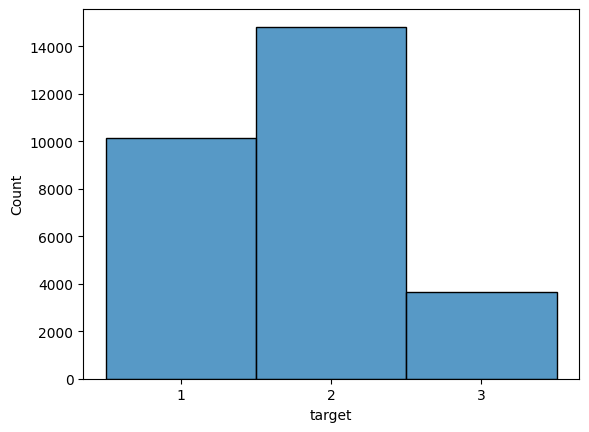

In [192]:
sns.histplot(data= y)

In [193]:
# Split into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED) 

In [194]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (20029, 23)
X_test shape: (8584, 23)
y_train shape: (20029,)
y_test shape: (8584,)


#### Preprocessing Pipeline

In [195]:
#from sklearn.pipeline import Pipeline

# Pipline for numerical features
# Initiating Pipeline and calling one step after another
# each step is built as a list of (key, value)
# key is the name of the processing step
# value is an estimator object (processing step)
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
# Pipeline for missing values: in this case missing values are nan!
miss_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median',missing_values=np.nan)),
    ('std_scaler', StandardScaler())
])
# replace 0 values
# Pipeline for missing values: in this case missing values are 0!
replace_pipeline = Pipeline([
    ('imputer_null', SimpleImputer(strategy='constant', fill_value = 0)),
    ('imputer_nan', SimpleImputer(strategy='median', missing_values= 0)),
    ('std_scaler', StandardScaler())
])

# Pipeline for categorical features 
cat_pipeline = Pipeline([
    #('imputer_cat', SimpleImputer(strategy='constant',fill_value='missing')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for categorical features 
time_pipeline = Pipeline([
    #('imputer_cat', SimpleImputer(strategy='constant',fill_value='missing')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
    ])


In [196]:
#from sklearn.compose import ColumnTransformer

# Complete pipeline for numerical and categorical features
# 'ColumnTranformer' applies transformers (num_pipeline/ cat_pipeline)
# to specific columns of an array or DataFrame (num_features/cat_features)
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('miss', miss_pipeline, miss_features),
    ('replace', replace_pipeline, replace_features),
    ('time', time_pipeline, time_features)
])


### Predictive modeling using Pipelines and GridSearch

#### K-nearest neighbors (KNN)

In [197]:
# Building a full pipeline with our preprocessor and a LogisticRegression Classifier
pipe_KNN = Pipeline([
    ('preprocessor', preprocessor),
    ('KNN', KNeighborsClassifier())
])

In [198]:
# Making predictions on the training set using cross validation as well as calculating the probabilities
# cross_val_predict expects an estimator (model), X, y and nr of cv-splits (cv)
y_train_predicted = cross_val_predict(pipe_KNN, X_train, y_train, cv=5)

/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over 

In [199]:
# Calculating the accuracy for the LogisticRegression Classifier 
print('Cross validation scores:')
print('-------------------------')
print("Accuracy: {:.5f}".format(accuracy_score(y_train, y_train_predicted)))
print("Recall: {:.5f}".format(recall_score(y_train, y_train_predicted, average = "micro")))
print("Precision: {:.5f}".format(precision_score(y_train, y_train_predicted, average = "weighted")))
print("Fbeta: {:.5f}".format(fbeta_score(y_train, y_train_predicted, beta=2, average = "weighted")))
print("F: {:.5f}".format(f1_score(y_train, y_train_predicted, average = "weighted")))
print("Kappa: {:.5f}".format(cohen_kappa_score(y_train, y_train_predicted)))

Cross validation scores:
-------------------------
Accuracy: 0.66524
Recall: 0.66524
Precision: 0.66723
Fbeta: 0.66271
F: 0.66113
Kappa: 0.41297


In [200]:
confusion_matrix(y_train,y_train_predicted)

array([[4522, 2483,   44],
       [2316, 7682,  406],
       [ 226, 1230, 1120]])

#### Optimizing via GridSearch

In [201]:
# Defining parameter space for grid-search. Since we want to access the classifier step (called 'logreg') in our pipeline 
# we have to add 'logreg__' infront of the corresponding hyperparameters. 
param_KNN = {'KNN__n_neighbors':(3,4,5,6,7,8),
                'KNN__metric': ['euclidean'],
                'KNN__weights': ['distance']
               }

grid_KNN = GridSearchCV(pipe_KNN, param_grid=param_KNN, cv=5, scoring= cohen_kappa_score, 
                           verbose=5, n_jobs=-1)

In [202]:
grid_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: cohen_kappa_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packag

[CV 1/5] END KNN__metric=euclidean, KNN__n_neighbors=3, KNN__weights=distance;, score=nan total time=   0.1s
[CV 3/5] END KNN__metric=euclidean, KNN__n_neighbors=3, KNN__weights=distance;, score=nan total time=   0.1s
[CV 2/5] END KNN__metric=euclidean, KNN__n_neighbors=3, KNN__weights=distance;, score=nan total time=   0.1s
[CV 4/5] END KNN__metric=euclidean, KNN__n_neighbors=3, KNN__weights=distance;, score=nan total time=   0.1s
[CV 2/5] END KNN__metric=euclidean, KNN__n_neighbors=4, KNN__weights=distance;, score=nan total time=   0.1s
[CV 5/5] END KNN__metric=euclidean, KNN__n_neighbors=3, KNN__weights=distance;, score=nan total time=   0.1s
[CV 4/5] END KNN__metric=euclidean, KNN__n_neighbors=4, KNN__weights=distance;, score=nan total time=   0.1s
[CV 1/5] END KNN__metric=euclidean, KNN__n_neighbors=4, KNN__weights=distance;, score=nan total time=   0.1s
[CV 3/5] END KNN__metric=euclidean, KNN__n_neighbors=4, KNN__weights=distance;, score=nan total time=   0.1s
[CV 5/5] END KNN__m

/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: cohen_kappa_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packag

[CV 1/5] END KNN__metric=euclidean, KNN__n_neighbors=5, KNN__weights=distance;, score=nan total time=   0.1s
[CV 3/5] END KNN__metric=euclidean, KNN__n_neighbors=5, KNN__weights=distance;, score=nan total time=   0.1s
[CV 2/5] END KNN__metric=euclidean, KNN__n_neighbors=5, KNN__weights=distance;, score=nan total time=   0.1s
[CV 5/5] END KNN__metric=euclidean, KNN__n_neighbors=5, KNN__weights=distance;, score=nan total time=   0.1s
[CV 4/5] END KNN__metric=euclidean, KNN__n_neighbors=5, KNN__weights=distance;, score=nan total time=   0.1s
[CV 1/5] END KNN__metric=euclidean, KNN__n_neighbors=6, KNN__weights=distance;, score=nan total time=   0.1s
[CV 2/5] END KNN__metric=euclidean, KNN__n_neighbors=6, KNN__weights=distance;, score=nan total time=   0.1s
[CV 1/5] END KNN__metric=euclidean, KNN__n_neighbors=7, KNN__weights=distance;, score=nan total time=   0.1s
[CV 5/5] END KNN__metric=euclidean, KNN__n_neighbors=6, KNN__weights=distance;, score=nan total time=   0.1s
[CV 2/5] END KNN__m

/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: cohen_kappa_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/isabellecarinaflaig/neuefische/ML-project_Air-Pollution/.venv/lib/python3.9/site-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['precipitable_water_entire_atmosphere',
                                                                          'relative_humidity_2m_above_ground',
                                                                          'specific_humidity_2m_above_ground',
                                                                          'temperature_2m_above_ground',
                                                                          'windstrength']),
                                                                        ('cat',
                 

In [203]:
# Show best parameters
print('Best score:\n{:.2f}'.format(grid_KNN.best_score_))
print("Best parameters:\n{}".format(grid_KNN.best_params_))

Best score:
nan
Best parameters:
{'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3, 'KNN__weights': 'distance'}


In [204]:
# Save best model (including fitted preprocessing steps) as best_model 
best_model = grid_KNN.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['precipitable_water_entire_atmosphere',
                                                   'relative_humidity_2m_above_ground',
                                                   'specific_humidity_2m_above_ground',
                                                   'temperature_2m_above_ground',
                                                   'windstrength']),
                                                 ('cat',
                                                  Pipeline(steps=[('1hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))...
                                                                   StandardScaler

In [205]:
# Calculating the accuracy for the LogisticRegression Classifier 
y_test_predicted = best_model.predict(X_test)
print('Cross validation scores:')
print('-------------------------')
print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_test_predicted)))
print("Recall: {:.5f}".format(recall_score(y_test, y_test_predicted, average = "micro")))
print("Precision: {:.5f}".format(precision_score(y_test, y_test_predicted, average = "weighted")))
print("Fbeta: {:.5f}".format(fbeta_score(y_test, y_test_predicted,beta=2, average = "weighted")))
print("F: {:.5f}".format(f1_score(y_test, y_test_predicted, average = "weighted")))
print("Kappa: {:.5f}".format(cohen_kappa_score(y_test, y_test_predicted)))

Cross validation scores:
-------------------------
Accuracy: 0.67370
Recall: 0.67370
Precision: 0.67243
Fbeta: 0.67296
F: 0.67230
Kappa: 0.43908


In [206]:
confusion_matrix(y_train,y_train_predicted)

array([[4522, 2483,   44],
       [2316, 7682,  406],
       [ 226, 1230, 1120]])

In [207]:
cm = confusion_matrix(y_test,y_test_predicted)
cm

array([[1961, 1047,   66],
       [ 861, 3238,  329],
       [  69,  429,  584]])

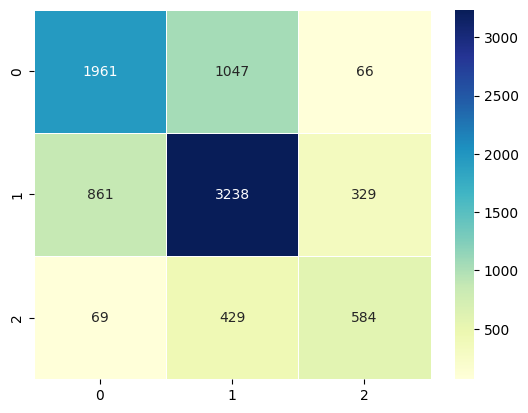

In [208]:
sns.heatmap(cm, cmap= 'YlGnBu', annot=True, fmt='d', linewidths=.5);